In [1]:
# Import required libraries
import pandas as pd
import numpy as np 
import tensorflow.keras as keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, BatchNormalization
from keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler ,MinMaxScaler
from sklearn import preprocessing

In [2]:
#Data preprocessing: It involves loading CSV data, label encoding, feature scaling and data split into training and test set.
# loading CSV data
data = pd.read_csv('mycsv_35_new5genre.csv') 
print(data.shape)
data.describe()
data.head()

(1497, 51)


,filename,zcr_mean,zcr_var,rmse_mean,rmse_var,spectral_centroid,mean_spectral_rolloff,var_spectral_rolloff,spectral_bandwidth,chroma_deviation_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,genre
0,blues.00000_1.wav,0.078317,0.013519,0.124483,0.056088,1782.622682,3845.075667,912.603923,2020.556328,0.342053,...,8.364929,-2.870996,5.956472,0.306078,6.595972,-2.700369,7.661201,2.370232,6.931646,blues
1,blues.00000_2.wav,0.079108,0.015145,0.135369,0.053363,1803.133844,3903.829836,1059.169428,2043.208033,0.366391,...,6.095594,-0.946113,6.237660,-0.170836,6.636129,-2.291198,6.289830,1.508931,5.563946,blues
2,blues.00000_3.wav,0.085122,0.017463,0.130891,0.049173,1767.406536,3672.610197,846.426470,1944.426261,0.341613,...,7.039822,-2.871219,5.890341,0.118136,6.060444,-3.230836,8.228865,0.995681,7.727270,blues
3,blues.00001_1.wav,0.054409,0.028735,0.094405,0.048287,1364.273766,2976.303348,1565.934901,1842.030467,0.358000,...,7.924546,0.497852,7.825360,0.039326,6.962971,-1.083576,7.379338,-0.112309,7.344995,blues
4,blues.00001_2.wav,0.051896,0.017981,0.087959,0.045535,1581.277785,3786.371459,1798.029729,2125.234003,0.346125,...,7.415159,0.114600,7.570110,-0.367247,6.951124,-2.646990,6.376883,1.118412,6.769454,blues


In [3]:
# Dropping unnecessary columns
dataset = data.drop(['filename'],axis=1)
dataset.head()

,zcr_mean,zcr_var,rmse_mean,rmse_var,spectral_centroid,mean_spectral_rolloff,var_spectral_rolloff,spectral_bandwidth,chroma_deviation_mean,mfcc1_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,genre
0,0.078317,0.013519,0.124483,0.056088,1782.622682,3845.075667,912.603923,2020.556328,0.342053,-125.188171,...,8.364929,-2.870996,5.956472,0.306078,6.595972,-2.700369,7.661201,2.370232,6.931646,blues
1,0.079108,0.015145,0.135369,0.053363,1803.133844,3903.829836,1059.169428,2043.208033,0.366391,-104.649918,...,6.095594,-0.946113,6.237660,-0.170836,6.636129,-2.291198,6.289830,1.508931,5.563946,blues
2,0.085122,0.017463,0.130891,0.049173,1767.406536,3672.610197,846.426470,1944.426261,0.341613,-112.962753,...,7.039822,-2.871219,5.890341,0.118136,6.060444,-3.230836,8.228865,0.995681,7.727270,blues
3,0.054409,0.028735,0.094405,0.048287,1364.273766,2976.303348,1565.934901,1842.030467,0.358000,-221.931198,...,7.924546,0.497852,7.825360,0.039326,6.962971,-1.083576,7.379338,-0.112309,7.344995,blues
4,0.051896,0.017981,0.087959,0.045535,1581.277785,3786.371459,1798.029729,2125.234003,0.346125,-222.168320,...,7.415159,0.114600,7.570110,-0.367247,6.951124,-2.646990,6.376883,1.118412,6.769454,blues


In [4]:
# Label encoding
encode = LabelEncoder().fit(dataset.iloc[:,-1])
y= LabelEncoder().fit_transform(dataset.iloc[:,-1]) #feature scaling
y.shape

(1497,)

In [5]:
X = StandardScaler().fit_transform(np.array(dataset.iloc[:, :-15], dtype = float))
X.shape

(1497, 35)

In [6]:
#Creating training and testing data set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1047, 35) (1047,)
Test set: (450, 35) (450,)


In [7]:
# defining our regression model 
n_cols = dataset.iloc[:, :-15].shape[1]
def regression_model_1():
    # structure of our model
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(n_cols,)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(5,activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               9216      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [8]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=10, 
                                            verbose=1, 
                                            )
Callbacks = [earlystop, learning_rate_reduction]

In [9]:
#build the model
model_1 = regression_model_1()

#fit the model
#model_1.fit(X_train,y_train,epochs=100,batch_size=150)
model_1.fit(X_train,y_train, callbacks=Callbacks , validation_data=(X_test,y_test) ,epochs=100,batch_size=50)

Epoch 1/100
21/21 [==============================] - 19s 59ms/step - loss: 1.4599 - accuracy: 0.4059 - val_loss: 1.3092 - val_accuracy: 0.6222 - lr: 0.0010
Epoch 2/100
21/21 [==============================] - 0s 7ms/step - loss: 0.9207 - accuracy: 0.6409 - val_loss: 1.0666 - val_accuracy: 0.7644 - lr: 0.0010
Epoch 3/100
21/21 [==============================] - 0s 7ms/step - loss: 0.7429 - accuracy: 0.7278 - val_loss: 0.8790 - val_accuracy: 0.8200 - lr: 0.0010
Epoch 4/100
21/21 [==============================] - 0s 7ms/step - loss: 0.6115 - accuracy: 0.7822 - val_loss: 0.7186 - val_accuracy: 0.8578 - lr: 0.0010
Epoch 5/100
21/21 [==============================] - 0s 7ms/step - loss: 0.5317 - accuracy: 0.8262 - val_loss: 0.6083 - val_accuracy: 0.8600 - lr: 0.0010
Epoch 6/100
21/21 [==============================] - 0s 7ms/step - loss: 0.4920 - accuracy: 0.8243 - val_loss: 0.5161 - val_accuracy: 0.8622 - lr: 0.0010
Epoch 7/100
21/21 [==============================] - 0s 6ms/step - loss: 0

In [10]:
#model_1.save('Keras_reg_30sec_5.h5')
#model_1.save('Keras_reg_30sec_5_35.h5')
#model_1.save('Keras_reg_30sec_5_31_chroma.h5')
#model_1.save('Keras_reg_30sec_5_35+chroma.h5')
#model_1.save('Keras_reg_30sec_new5_35+chroma.h5')
#model_1.save('Keras_reg_30sec_new5_35(1).h5')
#model_1.save('Keras_reg_30sec_10_35.h5') 

#1st combination
model_1.save('Keras_reg_30sec_new5_35_as.h5') 
#model_1.save('Keras_reg_30sec_new5_35+chroma_as.h5')

#2nd combination
#model_1.save('Keras_reg_30sec_new5_35_as(1).h5')
#model_1.save('Keras_reg_30sec_new5_35+chroma_as(1).h5')

In [11]:
#model = load_model('Keras_reg_30sec_5_35.h5')
model = load_model('Keras_reg_30sec_new5_35_as.h5')
score = model.evaluate(X_test,y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 92.44%


In [12]:
#predictions = model.predict_classes(X_test)
predict_x=model.predict(X_test) 
predictions=np.argmax(predict_x,axis=1)
print(predictions)
print(y_test)

[2 4 4 4 2 2 2 2 1 0 2 3 4 4 0 0 2 3 1 0 1 1 0 4 1 1 4 4 4 2 0 1 2 4 2 2 1
 1 1 0 1 2 3 4 1 1 3 1 1 1 3 3 1 2 1 2 0 4 0 4 3 3 4 0 2 1 1 4 4 2 3 3 2 1
 3 1 1 2 2 1 3 0 0 2 0 0 3 4 2 2 3 1 3 3 0 3 1 0 1 3 2 2 2 1 4 0 0 0 0 2 1
 4 2 1 0 1 2 4 0 3 2 1 2 2 0 3 2 2 2 0 0 0 1 3 1 0 3 1 3 0 1 0 4 3 0 1 2 4
 2 4 3 3 1 1 2 4 1 2 0 1 3 0 1 0 0 4 4 2 1 2 3 1 3 0 2 1 3 1 2 2 3 0 4 2 2
 3 4 1 1 0 4 2 4 4 0 4 0 2 3 3 3 1 4 3 3 0 3 1 1 0 2 3 3 3 4 1 2 4 0 0 4 3
 3 0 4 4 0 4 4 1 1 3 1 3 2 4 4 4 2 2 2 3 0 2 2 3 4 3 0 3 2 2 3 1 4 3 3 3 3
 0 0 4 3 4 3 1 0 1 3 4 0 1 2 3 2 3 4 3 3 2 4 2 4 0 3 0 4 0 4 2 4 0 4 4 3 1
 4 3 4 1 3 4 3 1 3 4 4 3 2 1 1 1 4 4 3 2 2 0 3 1 4 3 4 1 4 0 4 0 0 4 1 3 1
 1 3 0 0 1 1 2 1 2 3 3 4 0 3 2 2 4 2 0 3 3 2 1 3 1 0 1 3 1 0 4 3 0 2 0 2 4
 4 1 4 2 2 2 2 0 1 1 4 2 3 1 3 3 1 1 3 1 1 1 2 0 3 1 4 2 4 4 4 1 1 1 1 0 2
 3 1 3 0 2 3 0 4 2 4 0 2 0 1 3 3 3 1 0 4 4 0 1 0 3 3 3 1 0 2 2 3 0 3 0 4 2
 4 4 4 1 4 0]
[3 4 4 4 2 2 3 2 1 0 2 3 4 4 0 0 2 3 1 0 1 1 0 4 1 1 4 4 4 2 0 1 2 4 3 2 1
 1 1 0 1 2 

In [13]:
#Confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,predictions)
print(cf_matrix)

[[76  0  5  0  3]
 [ 0 91  0  0  1]
 [ 1  1 71  1  2]
 [ 3  0  6 96  0]
 [ 1  5  5  0 82]]


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'blues'),
  Text(0, 1.5, 'classical'),
  Text(0, 2.5, 'country'),
  Text(0, 3.5, 'hiphop'),
  Text(0, 4.5, 'jazz')])

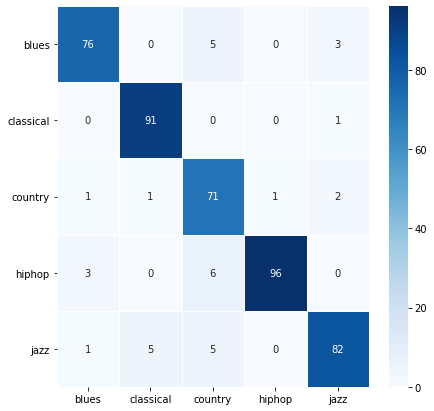

In [14]:
import matplotlib.pyplot as plt
classes=['blues', 'classical', 'country','hiphop', 'jazz']

fig, ax = plt.subplots(figsize=(7,7))         # Sample figsize in inches
sns.heatmap(cf_matrix, annot=True , cmap='Blues',xticklabels=classes,yticklabels=classes,linewidth=1,linecolor='w',ax=ax)
plt.yticks(rotation=0) 